In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filepath = "/Users/nadegelan/Documents/E4S/MGT494/FinalExam/112358-V1/AER_08_APP/"
table2_data = pd.read_stata(filepath+"TABLE2/T2_data.dta")

************************************************************************
				VARIABLES 							
*************************************************************************
					
- IN_DATA	A dummy indicating whether the unit is included in the analysis
 			(units are excluded if one or more variables are missing).
- FAC_ID	A unique facility identifier
- OWN_ID	A unique owner identifier
- UNIt_ID	A unique boiler identifier
- REGIME	Indicates if the facility is deregulated (1) regulated (2) or public(3)					
- U_CAP		Summer capacity (MW)
- U_SUM_HR	Summer heat rate (kWh/btu)
- U_AGE		Plant age (as of 2000)
- U_SUM_CF	Plant capcity factor
- PRE_RET_	Pre-retrofit NOx emissions rate
					
- D_SCR		Dummy indicating SCR retrofit
- D_SNCR	Dummy indicating SNCR retrofit
- D_LN		Dummy indicating LNB retrofit
- D_CM		Dummy indicating CM retrofit					
- D_NO		Dummy indicating no retrofit

- C_CM		CM retrofit dummy * capacity	
- C_NONE	No retrofit dummy * capacity	
- C_LN		LN retrofit dummy * capacity	
- C_SC		SC retrofit dummy * capacity						
- C_SN	  	SN retrofit dummy * capacity	

- REG		Regulated unit dummy
- PUB		Public dummy
- UNREG		Unregulated unit dummy

**************************************************************************************/

In [15]:
table2_data['REGIME'].unique()

array([2., 3., 1.], dtype=float32)

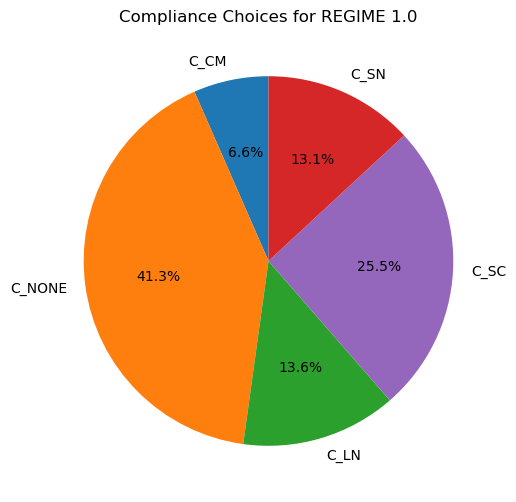

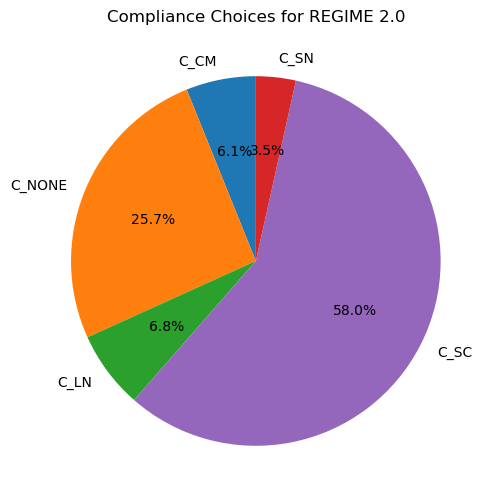

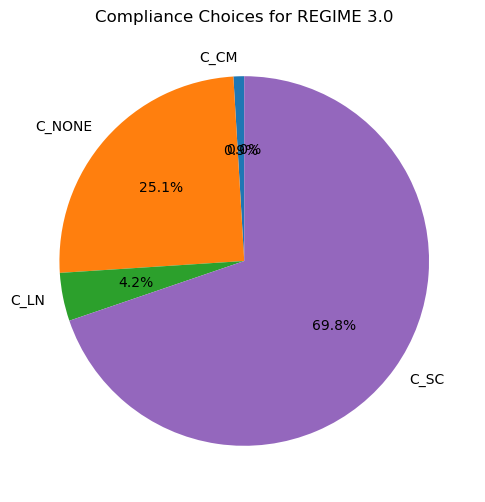

In [31]:
# Generate table for compliance choices by regime
compliance_choices = table2_data.groupby("REGIME")[["C_CM", "C_NONE", "C_LN", "C_SC", "C_SN"]].sum().reset_index()

color_palette = {
    "C_CM": "#1f77b4",    # Blue
    "C_NONE": "#ff7f0e",  # Orange
    "C_LN": "#2ca02c",    # Green
    "C_SC": "#9467bd",    # Red
    "C_SN": "#d62728"     # Purple
}

for regime in compliance_choices['REGIME'].unique():
    # Filter rows for the current regime
    regime_data = compliance_choices[compliance_choices['REGIME'] == regime]
    
    # Drop the REGIME column and transpose to get a single Series for pie chart
    regime_data = regime_data.drop(columns=['REGIME']).iloc[0]
    
    # Map colors to the columns
    colors = [color_palette[col] for col in regime_data.index]
    
    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    regime_data.plot.pie(
        autopct='%1.1f%%', 
        labels=regime_data.index, 
        startangle=90,
        colors=colors
    )
    
    # Add title and remove y-label
    plt.title(f"Compliance Choices for REGIME {regime}")
    plt.ylabel("")  # Remove the y-axis label for cleaner look
    plt.show()

In [8]:
# Summary statistics for missing data
missing_data_summary = table2_data.groupby("IN_DATA").agg({
    "U_CAP": ["mean", "count"],
    "U_AGE": ["mean", "count"]
})
print("\nSummary Statistics for Missing Data:")
print(missing_data_summary)


Summary Statistics for Missing Data:
              U_CAP            U_AGE      
               mean count       mean count
IN_DATA                                   
0.0       51.653061    81  21.065790    76
1.0      271.716309   632  36.167721   632


In [9]:
# Filter to include only rows where IN_DATA == 1
filtered_data = table2_data[table2_data["IN_DATA"] == 1]

In [10]:
# Summarize capacity and unit age
capacity_age_summary = filtered_data.groupby("REGIME").agg({
    "U_CAP": ["mean", "std"],
    "U_AGE": ["mean", "std"]
})
print("\nCapacity and Unit Age Summary:")
print(capacity_age_summary)


Capacity and Unit Age Summary:
             U_CAP                  U_AGE           
              mean         std       mean        std
REGIME                                              
1.0     248.765808  211.752834  37.383259  11.448163
2.0     314.028656  278.950700  35.513699  11.404609
3.0     208.482300  226.789054  35.415928  10.972145


In [12]:
# Summarize summer heat rate and pre-retrofit emissions rates
heat_emissions_summary = filtered_data.groupby("REGIME").agg({
    "U_SUM_HR": ["mean", "std"],
    "PRE_RET_MNEMI": ["mean", "std"]
})
print("\nSummer Heat Rate and Pre-Retrofit Emissions Summary:")
print(heat_emissions_summary)


Summer Heat Rate and Pre-Retrofit Emissions Summary:
            U_SUM_HR              PRE_RET_MNEMI          
                mean          std          mean       std
REGIME                                                   
1.0     12119.952148  4746.764800      0.478002  0.207366
2.0     11866.420898  5955.843917      0.537068  0.216587
3.0     12183.877930  1897.702727      0.552077  0.225908


In [13]:
# Summarize summer capacity factors
capacity_factors_summary = filtered_data.groupby("REGIME").agg({
    "U_SUM_CF": ["mean", "std"]
})
print("\nSummer Capacity Factors Summary:")
print(capacity_factors_summary)


Summer Capacity Factors Summary:
         U_SUM_CF           
             mean        std
REGIME                      
1.0     62.524273  16.804379
2.0     67.266457  14.286193
3.0     67.897324  12.530326
